In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import proj3d, Axes3D  # noqa: F401 unused import
from matplotlib.patches import FancyArrowPatch

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

matplotlib.rcParams.update({'font.size': 16, 'font.family': 'serif'})

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [4]:
labels = ["this is so terrible .", "this is so godawful .", "this is so dreadful .", "this is so bad .", "this is so awful ."]

D:\Miniconda3\envs\xbert\lib\site-packages\ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
D:\Miniconda3\envs\xbert\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


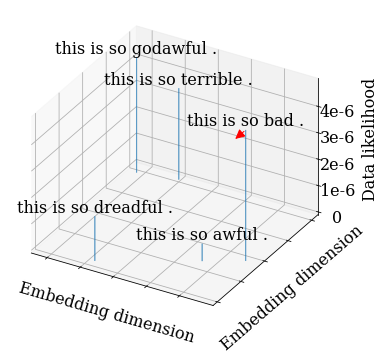

In [5]:
# Fixing random state for reproducibility, 60 gives good random numbers
np.random.seed(60)

# Create five bars with labels
x, y, dz = np.random.rand(3, 5)
dx = dy = 0.001 * np.ones_like(dz)
z = np.zeros_like(dz)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')

for _x, _y, _z, label in zip(x, y, dz, labels):
    ax.text(_x, _y, _z+0.03, label, ha='center')
    

arrow = Arrow3D([x[3], x[3]], [y[3], y[3]-0.05], [dz[3], dz[3]], mutation_scale=20, lw=1,
                arrowstyle="-|>", color="r")
ax.add_artist(arrow)

# Set axis ticks    
ax.w_xaxis.set_ticklabels([]*5)
ax.w_yaxis.set_ticklabels([]*5)
ax.w_zaxis.set_ticklabels(['0', '1e-6', '2e-6', '3e-6', '4e-6', '5e-6', '6e-6'])

# Set axis labels
ax.set_xlabel('Embedding dimension')
ax.set_ylabel('Embedding dimension')
ax.set_zlabel('Data likelihood', labelpad=10)

ax.bar3d(x, y, z, dx, dy, dz, shade=False)
plt.tight_layout()

In [6]:
fig.savefig('../data/embedding_likelihood.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
